In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFileCut = './DMsimp_spin-1_Monojet_DF.pcl'
dfAll = pd.read_pickle(pickleFileCut)

In [3]:
df = dfAll[(dfAll['Coupling'] == 'Axial') 
                 & (dfAll['Mode'] == 'DM+QCDjets') 
                 & (dfAll['Data-takingperiod'] == 2017)]

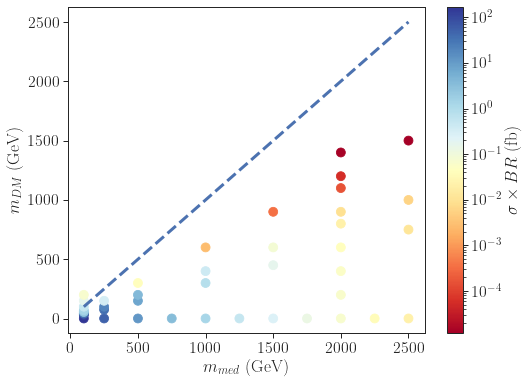

In [4]:
plt.figure(figsize=(8,6))
p =plt.scatter(df['$m_{med}$'], df['$m_{DM}$'], c=df['Total xsec-pT150 (pb)'],
               s=80,cmap=cm,
               norm=LogNorm(vmin=df['Total xsec-pT150 (pb)'].min(),vmax=df['Total xsec-pT150 (pb)'].max()))
x = np.linspace(df['$m_{med}$'].min(),df['$m_{med}$'].max(),100)
plt.plot(x,x,linestyle='--',linewidth=3)
plt.colorbar(label=r'$\sigma \times BR$ (fb)')
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$m_{DM}$ (GeV)')
plt.show()

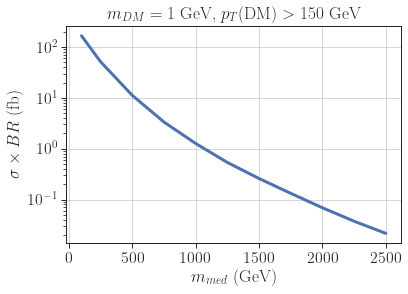

In [5]:
# Plot cross-sections for mDM = 1.0 only
df0 = df[df['$m_{DM}$'] == 1.0]
plt.plot(df0['$m_{med}$'], df0['Total xsec-pT150 (pb)'],linewidth=3)
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$\sigma \times BR$ (fb)')
plt.yscale('log')
plt.title(r'$m_{DM} = 1$ GeV, $p_T$(DM) $> 150$ GeV')
plt.grid()
plt.show()

In [6]:
dfModel = df[(df['Coupling'] == 'Axial') 
                   & (df['Mode'] == 'DM+QCDjets') 
                   & (df['Data-takingperiod'] == 2017)
                   & (df["$m_{med}$"] == 2000.) 
                   & (df["$m_{DM}$"] == 1.0)
                 ]
dfModel.T

,281
Coupling,Axial
Mode,DM+QCDjets
$m_{med}$,2000.0
$m_{DM}$,1.0
$g_{DM}$,1.0
...,...
bin_1250.0_1400.0,5.9266
bin_1250.0_1400.0_ErrorPlus,0.53802
bin_1250.0_1400.0_ErrorMinus,-0.53802
Luminosity (1/fb),41.5


In [7]:
dfModel = df[(df['Coupling'] == 'Axial') 
                   & (df['Mode'] == 'DM+QCDjets') 
                   & (df['Data-takingperiod'] == 2017)
                   & (df["$m_{med}$"] == 2000.)]
dfModel["$m_{DM}$"]

281       1.0
282     200.0
283     400.0
284     600.0
285     800.0
286     900.0
278    1100.0
279    1200.0
280    1400.0
Name: $m_{DM}$, dtype: float64